In [7]:
import os
os.listdir("..")


['data:raw:',
 'reports:slides:',
 '.DS_Store',
 'src:',
 '01_load_data.ipynb',
 'notebooks:',
 'reports:figures:',
 'data:processed:']

In [9]:
import pandas as pd

df = pd.read_csv("../data:processed:/spotify_clean.csv")
df.head()


,track_id,track_name,artists,album_name,track_genre,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity_bucket,tempo_bucket
0,5SuOikwiRyPMVoIQDJUgSV,Comedy,Gen Hoshino,Comedy,acoustic,73,230666,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,High,Slow
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost - Acoustic,Ben Woodward,Ghost (Acoustic),acoustic,55,149610,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,Medium,Slow
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,Ingrid Michaelson;ZAYN,To Begin Again,acoustic,57,210826,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,Medium,Slow
3,6lfxq3CG4xtTiEg7opyCyx,Can't Help Falling In Love,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,acoustic,71,201933,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,High,Fast
4,5vjLSffimiIP26QG5WcN2K,Hold On,Chord Overstreet,Hold On,acoustic,82,198853,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,High,Medium


In [10]:
df.shape


(114000, 19)

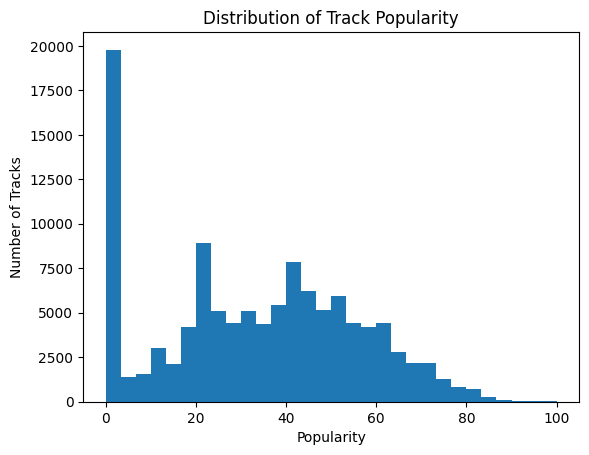

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["popularity"], bins=30)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Tracks")
plt.show()


In [12]:
plt.figure()
plt.hist(df["popularity"], bins=30)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Tracks")
plt.savefig("../reports:figures:/popularity_distribution.png")
plt.close()


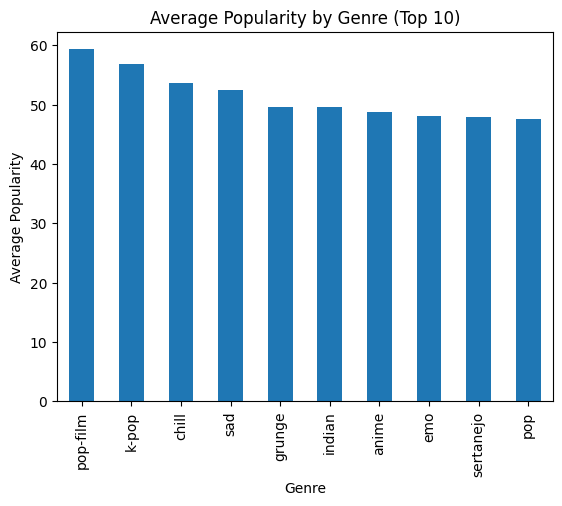

In [13]:
top_genres = (
    df.groupby("track_genre")["popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_genres.plot(kind="bar")
plt.title("Average Popularity by Genre (Top 10)")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.show()


In [14]:
top_genres.plot(kind="bar")
plt.title("Average Popularity by Genre (Top 10)")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.savefig("../reports:figures:/popularity_by_genre.png")
plt.close()


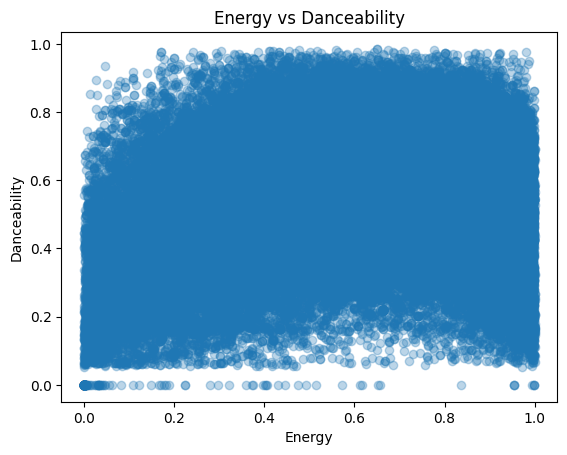

In [15]:
plt.figure()
plt.scatter(df["energy"], df["danceability"], alpha=0.3)
plt.title("Energy vs Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.show()


In [16]:
plt.figure()
plt.scatter(df["energy"], df["danceability"], alpha=0.3)
plt.title("Energy vs Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.savefig("../reports:figures:/energy_vs_danceability.png")
plt.close()


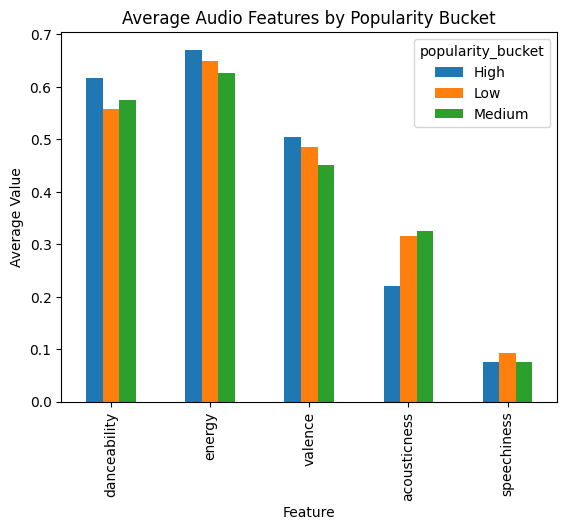

In [17]:
features = [
    "danceability", "energy", "valence",
    "acousticness", "speechiness"
]

bucket_means = df.groupby("popularity_bucket")[features].mean()
bucket_means.T.plot(kind="bar")
plt.title("Average Audio Features by Popularity Bucket")
plt.xlabel("Feature")
plt.ylabel("Average Value")
plt.show()


In [18]:
bucket_means.T.plot(kind="bar")
plt.title("Average Audio Features by Popularity Bucket")
plt.xlabel("Feature")
plt.ylabel("Average Value")
plt.savefig("../reports:figures:/features_by_popularity_bucket.png")
plt.close()


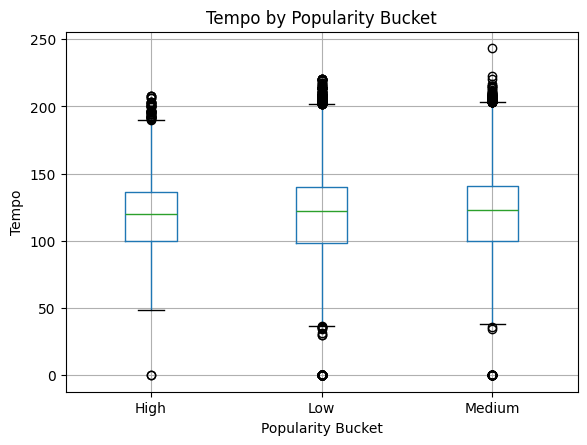

In [19]:
df.boxplot(column="tempo", by="popularity_bucket")
plt.title("Tempo by Popularity Bucket")
plt.suptitle("")
plt.xlabel("Popularity Bucket")
plt.ylabel("Tempo")
plt.show()


In [20]:
df.boxplot(column="tempo", by="popularity_bucket")
plt.title("Tempo by Popularity Bucket")
plt.suptitle("")
plt.xlabel("Popularity Bucket")
plt.ylabel("Tempo")
plt.savefig("../reports:figures:/tempo_by_popularity_bucket.png")
plt.close()


Popularity distribution

  Track popularity is highly right-skewed, with a large concentration of songs at very low popularity scores.

  Only a small fraction of tracks reach very high popularity (above ~70), suggesting that “hit” songs are relatively rare compared to the total volume of tracks released.

  This aligns with the idea that streaming platforms host a long tail of low-visibility content.

Average popularity by genre

  Certain genres consistently show higher average popularity, such as pop-film, k-pop, and chill.

  More niche or mood-based genres (for example emo, sertanejo) still maintain moderate average popularity, but trail mainstream genres.

  Genre alone appears to be associated with popularity, but not sufficient to fully explain it.

Energy vs danceability

  There is a dense clustering of tracks in the mid-to-high range for both energy and danceability.

  No strong linear relationship is visible, suggesting that energetic songs are not always highly danceable and vice versa.

  Popular tracks appear across a wide range of combinations, indicating flexibility in successful audio profiles.

Audio features by popularity bucket

  High-popularity tracks tend to have:

* Higher average energy

* Slightly higher danceability

* Lower acousticness

  Speechiness is generally low across all buckets, with minimal separation.

  This suggests that production-heavy, energetic tracks are more common among popular songs.

Tempo by popularity bucket

  Tempo distributions across popularity buckets are remarkably similar, with overlapping medians and interquartile ranges.

  Extreme tempos exist in all buckets, but tempo alone does not strongly differentiate popular tracks.

  Tempo may play a secondary role compared to other audio features like energy or valence.
